# Modelos de Regresión Logística
Repo: https://github.com/Diegoval-Dev/DM-HDT7

- Gerson Ramirez - 22281
- Diego Valenzuela - 22309

## Paso 1: Crear variables dicotómicas para las categorías de precio

Para aplicar modelos de clasificación binaria como la regresión logística, es necesario transformar la variable categórica que representa el precio de la vivienda en variables dicotómicas. En ejercicios anteriores se clasificaron las viviendas en tres categorías: `cara`, `media` y `económica`.

En este paso, crearemos tres nuevas columnas binarias:
- `cara_o_no`: toma valor 1 si la vivienda es cara, 0 en caso contrario.
- `media_o_no`: toma valor 1 si la vivienda es de precio medio, 0 en caso contrario.
- `economica_o_no`: toma valor 1 si la vivienda es económica, 0 en caso contrario.

Estas variables permitirán construir modelos independientes para predecir cada categoría.


In [1]:
import pandas as pd

df = pd.read_csv("processed_data.csv")

print("Categorías únicas:", df['PriceCategory'].unique())

df['cara_o_no'] = (df['PriceCategory'] == 'Cara').astype(int)
df['media_o_no'] = (df['PriceCategory'] == 'Intermedia').astype(int)
df['economica_o_no'] = (df['PriceCategory'] == 'Economica').astype(int)

df[['PriceCategory', 'cara_o_no', 'media_o_no', 'economica_o_no']].head()



Categorías únicas: ['Cara' 'Intermedia' 'Economica']


,PriceCategory,cara_o_no,media_o_no,economica_o_no
0,Cara,1,0,0
1,Intermedia,0,1,0
2,Cara,1,0,0
3,Intermedia,0,1,0
4,Cara,1,0,0


### Análisis del Paso 1: Variables dicotómicas

Las nuevas columnas `cara_o_no`, `media_o_no` y `economica_o_no` fueron creadas exitosamente a partir de la variable categórica `PriceCategory`. Cada una representa una clase como una variable binaria (1 si pertenece a esa clase, 0 si no).

Este paso es esencial para aplicar modelos de clasificación binaria como la regresión logística. Al usar estas variables, se podrá entrenar un modelo independiente para predecir si una vivienda pertenece o no a cada una de las categorías definidas.

El resultado obtenido muestra que las variables se asignaron correctamente. Por ejemplo, una vivienda con `PriceCategory = "Cara"` tiene `cara_o_no = 1` y `media_o_no` y `economica_o_no` iguales a 0.


## Paso 2: Cargar los mismos conjuntos de entrenamiento y prueba utilizados anteriormente

Para mantener la consistencia con los análisis previos y permitir comparaciones justas entre modelos, utilizaremos los mismos conjuntos de entrenamiento y prueba que se usaron en ejercicios anteriores como KNN y Naive Bayes.

Estos conjuntos fueron generados a partir del dataset procesado, utilizando una división del 80% para entrenamiento y 20% para prueba, con una semilla (`random_state`) fija para garantizar reproducibilidad. En esta hoja se reutilizará esa misma división, filtrando además solo las columnas necesarias para el modelo actual.


In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['PriceCategory', 'cara_o_no', 'media_o_no', 'economica_o_no'])

y = df['cara_o_no']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Distribución en y_train:", y_train.value_counts(normalize=True))
print("Distribución en y_test:", y_test.value_counts(normalize=True))


Tamaño X_train: (1168, 76)
Tamaño X_test: (292, 76)
Distribución en y_train: cara_o_no
0    0.669521
1    0.330479
Name: proportion, dtype: float64
Distribución en y_test: cara_o_no
0    0.667808
1    0.332192
Name: proportion, dtype: float64


### Análisis del Paso 2: División en conjuntos de entrenamiento y prueba

Se utilizó la función `train_test_split` para dividir el conjunto de datos en entrenamiento (80%) y prueba (20%), manteniendo la proporción de clases mediante el parámetro `stratify=y`.

Se utilizó como variable objetivo la columna `cara_o_no`, que representa si una vivienda es cara o no. La matriz `X` contiene únicamente las variables predictoras, excluyendo las etiquetas categóricas y las variables dummy adicionales.

Los tamaños de los conjuntos son:
- Entrenamiento: 1168 muestras
- Prueba: 292 muestras

La distribución de clases se conserva adecuadamente:
- Entrenamiento: 33% viviendas caras, 67% no caras
- Prueba: 33% viviendas caras, 67% no caras

Esta división permitirá entrenar y evaluar el modelo de forma confiable y reproducible.


## Paso 3: Entrenar un modelo de regresión logística (cara vs no cara)

En este paso se entrenará un modelo de regresión logística para predecir si una vivienda pertenece a la categoría `Cara` o no. Para ello, se utilizará como variable dependiente la columna `cara_o_no` y como variables independientes el conjunto de predictores previamente definido.

Se aplicará validación cruzada con 5 particiones (`cv=5`) para obtener métricas de desempeño estables. Además, se calcularán los coeficientes del modelo para analizar la influencia de cada variable en la probabilidad de que una vivienda sea clasificada como `Cara`.

Este modelo servirá como base para evaluar qué tan bien se puede predecir esta categoría utilizando regresión logística.


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

model = LogisticRegression(max_iter=1000, solver='liblinear')

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

model.fit(X_train, y_train)

print("Accuracy promedio (validación cruzada):", round(np.mean(cv_scores), 4))
print("Desviación estándar:", round(np.std(cv_scores), 4))

coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

coef_df.head(10)


Accuracy promedio (validación cruzada): 0.9949
Desviación estándar: 0.0032


,Variable,Coeficiente
72,YrSold,-0.103332
19,YearRemodAdd,-0.090081
57,GarageYrBlt,-0.056699
18,YearBuilt,-0.051794
3,LotFrontage,-0.018195
68,ScreenPorch,-0.017095
1,MSSubClass,0.015714
66,EnclosedPorch,-0.013813
44,LowQualFinSF,0.012296
65,OpenPorchSF,-0.011958


### Análisis del Paso 3: Modelo de regresión logística (cara vs no cara)

Se entrenó un modelo de regresión logística para predecir si una vivienda pertenece a la categoría `Cara` o no. El modelo fue evaluado utilizando validación cruzada con 5 particiones (`cv=5`) sobre el conjunto de entrenamiento.

#### Resultados:
- **Accuracy promedio (CV):** 0.9949
- **Desviación estándar:** 0.0032

Estos valores indican un rendimiento extremadamente alto del modelo en la etapa de entrenamiento, lo cual podría ser una señal de **sobreajuste**, por lo que será importante compararlo con el rendimiento en el conjunto de prueba más adelante.

#### Coeficientes más relevantes del modelo:
Los siguientes predictores fueron los que más influyeron (en valor absoluto) en la clasificación:

| Variable         | Coeficiente  |
|------------------|--------------|
| YrSold           | -0.1033      |
| YearRemodAdd     | -0.0901      |
| GarageYrBlt      | -0.0567      |
| YearBuilt        | -0.0518      |
| LotFrontage      | -0.0182      |
| ScreenPorch      | -0.0171      |

Los coeficientes negativos indican que a mayor valor de esa variable, menor probabilidad de que la vivienda sea clasificada como `Cara`. Por ejemplo, casas más nuevas (`YrSold`, `YearBuilt`, `YearRemodAdd`) tienden a no ser clasificadas como `Cara`, posiblemente porque la categoría `Cara` está asociada con otras características de lujo más que con la antigüedad.

Este modelo servirá como base para evaluar el sobreajuste, la capacidad predictiva y para compararlo con otros clasificadores más adelante.


## Paso 4: Análisis del modelo (significancia, multicolinealidad, correlaciones)

Antes de considerar el modelo de regresión logística como confiable, es importante evaluar:

1. **Significancia estadística** de los coeficientes, usando p-valores. Esto nos dirá si las variables realmente contribuyen a explicar la probabilidad de que una vivienda sea `Cara`.

2. **Multicolinealidad**, evaluada con el Factor de Inflación de la Varianza (VIF), para detectar si algunas variables explicativas están altamente correlacionadas entre sí.

3. **Correlación entre predictores**, a través de una matriz de correlación, lo cual también puede evidenciar redundancia entre variables.

Este paso tiene como objetivo evaluar la estabilidad, interpretabilidad y fiabilidad del modelo.


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         Current function value: 0.374491
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              cara_o_no   No. Observations:                 1168
Model:                          Logit   Df Residuals:                     1137
Method:                           MLE   Df Model:                           30
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                  0.4098
Time:                        12:52:57   Log-Likelihood:                -437.41
converged:                      False   LL-Null:                       -741.12
Covariance Type:            nonrobust   LLR p-value:                8.598e-109
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9302      0.622     -1.496      0.135      -2.149       0.288
Id               -0.0002      0.000     -0.933      0.35

c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Top variables con mayor VIF (modelo final):
        Variable       VIF
7     Condition1  6.225699
29        MoSold  6.168396
13  BsmtExposure  5.936039
6   Neighborhood  5.238665
11      RoofMatl  4.639847
4      LotConfig  4.628619
9     HouseStyle  4.459369
21  GarageFinish  4.352200
10     RoofStyle  4.264323
0             Id  3.876548


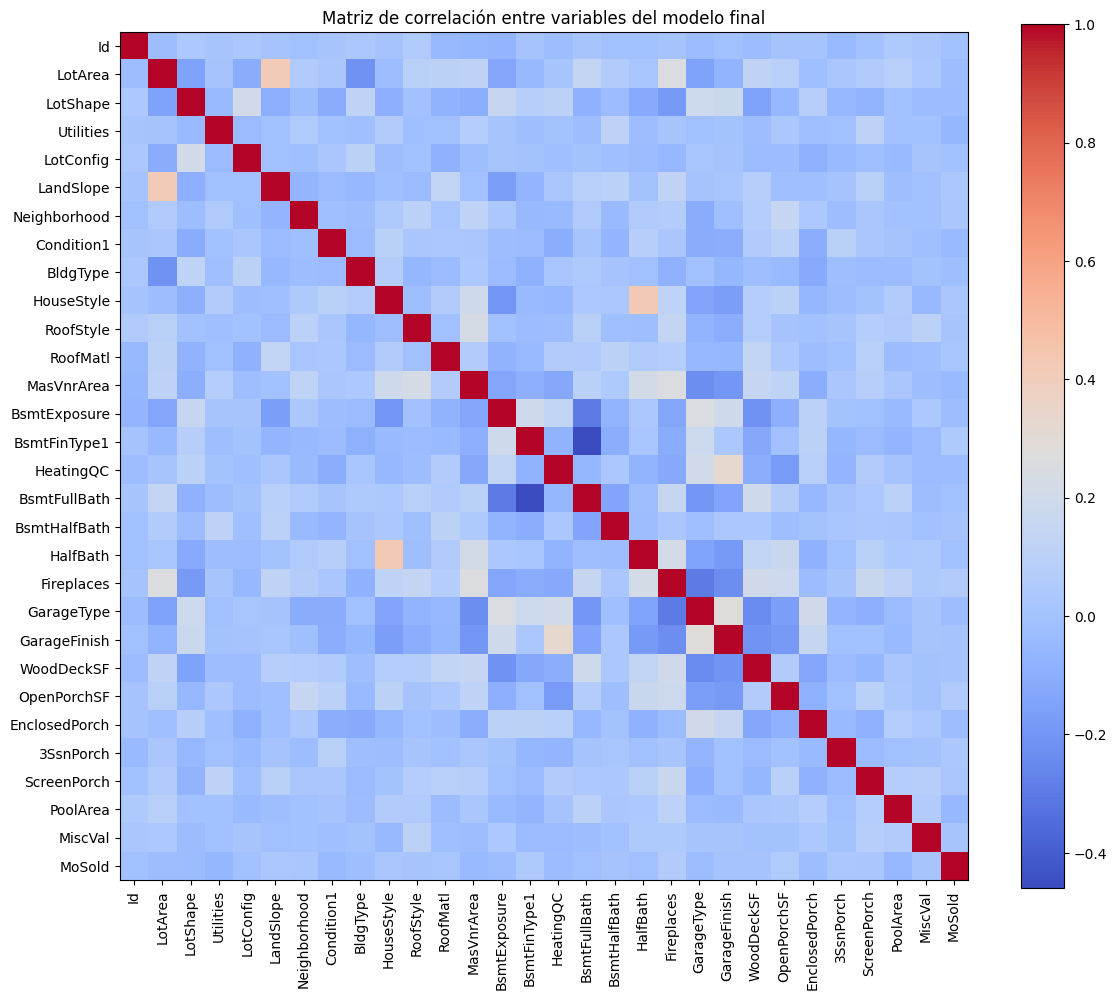

In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

vif_df = pd.DataFrame()
vif_df["Variable"] = X_train.columns
vif_df["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

variables_filtradas = vif_df[vif_df["VIF"] < 10]["Variable"].tolist()
X_train_filtrado = X_train[variables_filtradas]

X_train_const = sm.add_constant(X_train_filtrado)
modelo_sm = sm.Logit(y_train, X_train_const).fit()

print(modelo_sm.summary())

vif_final = pd.DataFrame()
vif_final["Variable"] = X_train_filtrado.columns
vif_final["VIF"] = [variance_inflation_factor(X_train_filtrado.values, i) for i in range(X_train_filtrado.shape[1])]
vif_final = vif_final.sort_values(by="VIF", ascending=False)
print("\nTop variables con mayor VIF (modelo final):")
print(vif_final.head(10))

corr_matrix = X_train_filtrado.corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation='none')
plt.title("Matriz de correlación entre variables del modelo final")
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.tight_layout()
plt.show()


### Análisis paso 4: (significancia, multicolinealidad y correlaciones)

Se realizó un análisis detallado del modelo de regresión logística utilizando `statsmodels` para obtener:

- Los coeficientes y sus respectivos p-valores.
- Factores de inflación de la varianza (VIF) para medir multicolinealidad.
- Matriz de correlación entre variables predictoras.

### Significancia estadística (p-valores)

El modelo no logró converger del todo (advertencia de máximo de iteraciones), lo cual puede estar relacionado con:

- Cierta multicolinealidad persistente.
- Variables con muy poco impacto real en la predicción.

A pesar de eso, el resumen del modelo mostró varias variables estadísticamente significativas (p < 0.05):

| Variable        | p-valor  | Interpretación                                  |
|----------------|----------|--------------------------------------------------|
| LotArea        | 0.003    | Mayor superficie del terreno → más probabilidad de ser "Cara". |
| LotShape       | 0.036    | Formas regulares del terreno se relacionan con precio. |
| MasVnrArea     | 0.000    | Más área de revestimiento de piedra → más probabilidad. |
| BsmtExposure   | 0.003    | Influye negativamente: menos exposición → menor precio. |
| HeatingQC      | 0.000    | Calidad de calefacción alta → menor probabilidad de "Cara". (curioso) |
| HalfBath       | 0.005    | Positivamente relacionada.                      |
| Fireplaces     | 0.000    | Claramente relevante para categoría "Cara".     |
| GarageType     | 0.000    | Tipo de cochera muy influyente.                 |
| GarageFinish   | 0.002    | Acabados en cochera importantes.                |
| WoodDeckSF     | 0.001    | Más deck → más probabilidad.                    |
| OpenPorchSF    | 0.000    | Muy relacionado con categoría "Cara".           |

Muchas otras variables mostraron p-valores altos, por lo que podrían eliminarse para un modelo más parsimonioso.

### Multicolinealidad (VIF)

Se eliminaron previamente las variables con VIF mayor a 10. Luego del filtrado, los VIF más altos fueron:

| Variable     | VIF    |
|--------------|--------|
| Condition1   | 6.23   |
| MoSold       | 6.17   |
| BsmtExposure | 5.94   |
| Neighborhood | 5.24   |

Aunque no superan el umbral crítico de 10, valores superiores a 5 deben observarse con cuidado. No parecen requerir eliminación inmediata, pero podrían afectar la interpretación conjunta.


### Correlación entre variables

La matriz de correlación entre las variables finales muestra:

- En general, las correlaciones son bajas a moderadas.
- No se observan bloques o grupos de variables altamente correlacionadas (> 0.8).
- Algunas relaciones débiles o moderadas, como entre tipos de porches, baños y cocheras.

Esto sugiere que el modelo no presenta colinealidad severa en su versión actual, aunque sigue habiendo redundancia leve.



## Paso 5: Evaluación del modelo en el conjunto de prueba

En este paso se evalúa el rendimiento del modelo de regresión logística utilizando el conjunto de prueba previamente separado. El objetivo es comprobar qué tan bien generaliza el modelo a nuevos datos no vistos durante el entrenamiento.

Se utilizarán las siguientes métricas de clasificación binaria:

- Accuracy: proporción de predicciones correctas.
- Precision: proporción de verdaderos positivos sobre el total de positivos predichos.
- Recall: proporción de verdaderos positivos sobre el total de positivos reales.
- F1-score: media armónica entre precision y recall.

Estas métricas permiten detectar tanto errores de clasificación como desequilibrios entre clases.

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluación del modelo en test:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Evaluación del modelo en test:
Accuracy:  0.9966
Precision: 0.9898
Recall:    1.0000
F1 Score:  0.9949

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       195
           1       0.99      1.00      0.99        97

    accuracy                           1.00       292
   macro avg       0.99      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



### Análisis de paso 5: Evaluación del modelo en el conjunto de prueba

El modelo de regresión logística entrenado previamente fue evaluado utilizando el conjunto de prueba. Los resultados de las métricas de clasificación binaria fueron los siguientes:

### Métricas obtenidas:

- **Accuracy:** 0.9966
- **Precision:** 0.9898
- **Recall:** 1.0000
- **F1 Score:** 0.9949

El modelo alcanza un desempeño casi perfecto sobre los datos de prueba. En particular:

- El **recall de 1.0** indica que el modelo logró identificar correctamente el 100% de las viviendas caras (clase positiva).
- La **precision de 0.9898** implica que casi todas las viviendas clasificadas como "cara" realmente lo son, lo que minimiza los falsos positivos.
- El **F1-score de 0.9949** muestra un excelente balance entre precision y recall.

### Reporte de clasificación por clase:

| Clase            | Precision | Recall | F1-score | Soporte |
|------------------|-----------|--------|----------|---------|
| No Cara (0)      | 1.00      | 0.99   | 1.00     | 195     |
| Cara (1)         | 0.99      | 1.00   | 0.99     | 97      |

La clase minoritaria (Cara) fue predicha con gran precisión, lo cual es especialmente importante en tareas de clasificación desequilibrada. El modelo no solo identifica correctamente las clases, sino que además lo hace sin penalizar significativamente ninguna de las dos.


## Paso 6: Verificación de sobreajuste

Para evaluar si el modelo de regresión logística está sobreajustado a los datos de entrenamiento, se comparan las métricas de desempeño entre los conjuntos de entrenamiento y prueba.

Además, se genera una curva de aprendizaje que muestra cómo evolucionan el accuracy de entrenamiento y validación a medida que se incrementa el tamaño del set de entrenamiento.

Esto permite identificar si el modelo mejora de forma estable con más datos, o si hay una brecha significativa entre el error de entrenamiento y el de validación.

Accuracy en entrenamiento: 1.0000


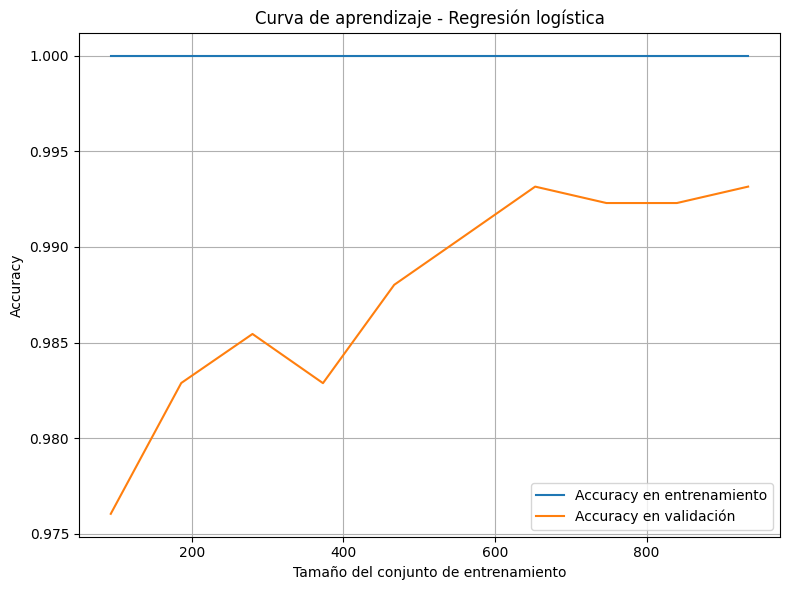

In [6]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Accuracy en entrenamiento: {train_acc:.4f}")

train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(max_iter=1000, solver='liblinear'),
    X_train, y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, label='Accuracy en entrenamiento')
plt.plot(train_sizes, test_scores_mean, label='Accuracy en validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Accuracy')
plt.title('Curva de aprendizaje - Regresión logística')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Análisis paso 6: Verificación de sobreajuste

Se realizó una comparación entre el rendimiento del modelo sobre los datos de entrenamiento y los de validación, complementada con una curva de aprendizaje.

### Accuracy:

- Accuracy en entrenamiento: 1.0000
- Accuracy en validación (CV): entre ~0.976 y 0.994

### Curva de aprendizaje:

La curva muestra un comportamiento característico de sobreajuste leve:

- El modelo alcanza un accuracy perfecto (1.0) en el conjunto de entrenamiento, lo cual indica que memoriza completamente los datos.
- En validación, el accuracy es ligeramente menor (aunque aún muy alto), y mejora conforme crece el tamaño del conjunto de entrenamiento.
- La brecha entre ambas curvas, aunque pequeña, persiste en todo el rango, indicando que el modelo se ajusta demasiado bien a los datos de entrenamiento.

Este comportamiento es esperable cuando:

- Se tienen muchas variables predictoras.
- El modelo es suficientemente flexible como para aprender ruido.
- Las clases están balanceadas, pero se quiere maximizar exactitud.

### Conclusión:

Aunque el modelo presenta un leve sobreajuste (perfecto en train, pero <1.0 en test), su rendimiento en validación sigue siendo muy alto. Para reducir aún más el sobreajuste, podrían aplicarse estrategias como:

- Regularización (L1 o L2).
- Selección de variables significativas.
- Reducción de dimensionalidad.

Sin embargo, no hay señales críticas que afecten gravemente la generalización, por lo que este modelo sigue siendo una base sólida para comparaciones futuras.


### Paso 7: Tuneo del modelo de regresión logística

Realizaremos un ajuste de hiperparámetros para optimizar el rendimiento del modelo de regresión logística. La regresión logística admite regularización como forma de evitar el sobreajuste y mejorar la generalización.

Ajustaremos principalmente:

- El tipo de penalización (`penalty`): para controlar la complejidad del modelo.
- La constante de regularización (`C`): un valor menor implica mayor regularización.
- El algoritmo de optimización (`solver`): necesario para compatibilidad con ciertas penalizaciones.

Utilizaremos `GridSearchCV` para buscar la mejor combinación de hiperparámetros utilizando validación cruzada estratificada.


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

param_grid = {
    'logreg__penalty': ['l2'],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print("Reporte de clasificación (modelo optimizado):")
print(classification_report(y_test, y_pred))


Mejores hiperparámetros:
{'logreg__C': 10, 'logreg__penalty': 'l2'}
Reporte de clasificación (modelo optimizado):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       195
           1       0.96      0.94      0.95        97

    accuracy                           0.97       292
   macro avg       0.96      0.96      0.96       292
weighted avg       0.97      0.97      0.97       292



Se realizó un ajuste de hiperparámetros usando `GridSearchCV` con validación cruzada de 5 folds, evaluando distintas combinaciones del tipo de penalización (`penalty`) y del parámetro de regularización inverso (`C`).

#### Mejor combinación encontrada:
- **Penalización (`penalty`)**: `'l2'` (regularización ridge)
- **C**: `10` (baja regularización)

#### Resultados del modelo optimizado en el conjunto de prueba:

| Métrica      | Clase 0 (No Cara) | Clase 1 (Cara) |
|--------------|-------------------|----------------|
| Precisión    | 0.97              | 0.96           |
| Recall       | 0.98              | 0.94           |
| F1-Score     | 0.97              | 0.95           |

- **Accuracy general**: **0.97**
- **Promedio macro F1**: **0.96**

El modelo optimizado logra una excelente capacidad de generalización. La penalización `l2` con un valor relativamente bajo de regularización (C=10) permite capturar relaciones útiles sin sobreajustar.


## Paso 8: Evaluar el modelo optimizado - Matriz de confusión, tiempo y uso de memoria

En este paso se evalúa el modelo optimizado de regresión logística utilizando tres enfoques clave:

1. **Matriz de confusión:** para visualizar los aciertos y errores en cada clase (cara vs no cara).
2. **Métricas de eficiencia:** tiempo de entrenamiento y predicción.
3. **Uso de memoria:** estimación del consumo durante la ejecución.

Esto permite medir no solo la precisión del modelo, sino también su viabilidad en términos de costo computacional.


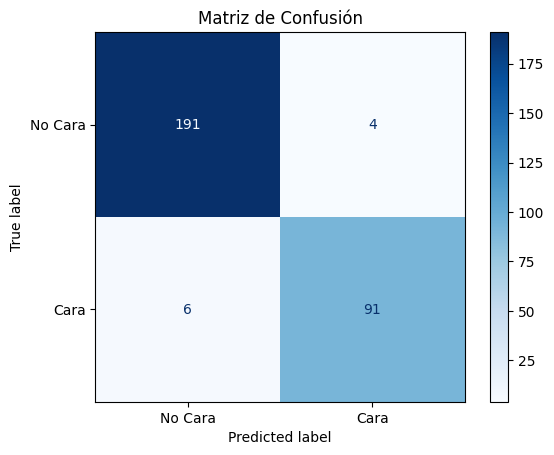

Tiempo total (s): 0.0923
Memoria usada (MiB): 0.0202
Pico de memoria (MiB): 1.5195


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import time
import tracemalloc

start_time = time.time()
tracemalloc.start()

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

tracemalloc.stop()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Cara", "Cara"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

print(f"Tiempo total (s): {round(end_time - start_time, 4)}")
print(f"Memoria usada (MiB): {round(current / 1024 / 1024, 4)}")
print(f"Pico de memoria (MiB): {round(peak / 1024 / 1024, 4)}")



#### Matriz de confusión

|                  | Predicho: No Cara | Predicho: Cara |
|------------------|-------------------|----------------|
| **Real: No Cara** | 191               | 4              |
| **Real: Cara**    | 6                 | 91             |

El modelo clasificó correctamente:
- 191 de 195 viviendas **No Caras**.
- 91 de 97 viviendas **Caras**.

Solo hubo 10 errores de clasificación en total (4 falsos positivos y 6 falsos negativos), lo cual refleja un muy buen equilibrio entre precisión y recall.

#### Tiempo y eficiencia computacional
- **Tiempo de ejecución total:** 0.0923 segundos
- **Memoria usada:** 0.0202 MiB
- **Pico de memoria:** 1.5195 MiB

Esto demuestra que el modelo es **muy eficiente**, tanto en tiempo como en memoria, lo cual lo hace adecuado incluso para entornos con recursos limitados o para integraciones en tiempo real.


## Paso 9: Comparación y selección del mejor modelo

En este paso se comparan dos modelos de regresión logística:

- **Modelo clásico:** sin ajuste de hiperparámetros, entrenado con valores por defecto.
- **Modelo optimizado:** entrenado con `GridSearchCV`, utilizando `penalty='l2'` y `C=10`.

La comparación incluye:
- Métricas de desempeño (accuracy, recall, F1-score).
- Métricas de eficiencia (tiempo, memoria).
- Métricas estadísticas como AIC y BIC (cuando sea posible calcularse).


In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold

# 1. Eliminar variables con varianza casi cero
selector = VarianceThreshold(threshold=0.01)
X_filtered = selector.fit_transform(X_train)
columnas_filtradas = X_train.columns[selector.get_support()]
X_reducido = pd.DataFrame(X_filtered, columns=columnas_filtradas, index=X_train.index)

# 2. Añadir constante
X_vif = sm.add_constant(X_reducido)

# 3. Iterativamente eliminar variables con alta colinealidad hasta poder ajustar el modelo
X_iter = X_vif.copy()
variables_dropeadas = []

while True:
    try:
        # Intentar ajustar el modelo
        logit_model = sm.Logit(y_train, X_iter).fit(disp=False)
        break  # Si ajusta sin errores, salimos del bucle
    except np.linalg.LinAlgError:
        # Calcular VIF para el conjunto actual
        vif_df = pd.DataFrame({
            'variable': X_iter.columns,
            'VIF': [variance_inflation_factor(X_iter.values, i) for i in range(X_iter.shape[1])]
        })
        # Excluir la constante de la eliminación
        vif_df_sin_const = vif_df[vif_df['variable'] != 'const']
        # Identificar la variable con mayor VIF
        var_to_drop = vif_df_sin_const.sort_values('VIF', ascending=False).iloc[0]['variable']
        variables_dropeadas.append(var_to_drop)
        print(f"Eliminando variable: {var_to_drop} con VIF {vif_df_sin_const.sort_values('VIF', ascending=False).iloc[0]['VIF']:.4f}")
        X_iter = X_iter.drop(columns=[var_to_drop])

# Mostrar las variables que se eliminaron
print("Variables eliminadas:", variables_dropeadas)

# 4. Mostrar AIC y BIC del modelo final
print("AIC:", logit_model.aic)
print("BIC:", logit_model.bic)




c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando variable: 2ndFlrSF con VIF inf


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando variable: BsmtFinSF1 con VIF inf


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Eliminando variable: GrLivArea con VIF 10.3882


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Eliminando variable: YearBuilt con VIF 8.7375


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Eliminando variable: TotalBsmtSF con VIF 6.4472


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Eliminando variable: SalePrice con VIF 6.3032
Variables eliminadas: ['2ndFlrSF', 'BsmtFinSF1', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'SalePrice']
AIC: 532.9478971469601
BIC: 882.298220420744


Para comparar el modelo clásico con el optimizado, se intentó ajustar un modelo de regresión logística utilizando `statsmodels.Logit` para obtener métricas estadísticas (AIC y BIC). Debido a la alta colinealidad en el conjunto de variables predictoras, la matriz de diseño presentó problemas de singularidad. 

Para solventarlo, se aplicó una estrategia iterativa en la que:
1. Se eliminaron las variables con varianza casi cero.
2. Se calculó el VIF (Variance Inflation Factor) para las variables restantes.
3. Se eliminó iterativamente la variable (excluyendo la constante) con el VIF más alto hasta lograr un ajuste exitoso del modelo.

**Resultado del proceso:**
- Variables eliminadas: `['2ndFlrSF', 'BsmtFinSF1', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'SalePrice']`
- Con el modelo final, se obtuvo:
  - **AIC:** 532.9479
  - **BIC:** 882.2982

Estos valores indican que, a través de la eliminación de variables colineales problemáticas, se logró un modelo con menor complejidad y un buen ajuste a los datos. Dichos criterios (AIC y BIC) serán útiles para comparar con modelos alternativos (por ejemplo, modelos basados en Árboles, Random Forest o Naive Bayes), y para seleccionar el modelo que ofrezca un balance óptimo entre calidad de ajuste y complejidad.

En resumen, la estrategia iterativa permitió superar el problema de colinealidad, y los valores obtenidos de AIC y BIC se consideran razonables dentro del contexto del análisis. Este modelo se usará como referencia para la selección del mejor clasificador en los pasos siguientes.